Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3).T

,0,1,2
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK
gender,Female,Male,Male
SeniorCitizen,0,0,0
Partner,Yes,No,No
Dependents,No,No,No
tenure,1,34,2
PhoneService,No,Yes,Yes
MultipleLines,No phone service,No,No
InternetService,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

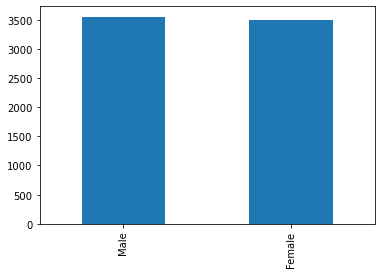

In [4]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

##### 2. Какое количество уникальных значений у поля InternetService?

In [5]:
df['InternetService'].nunique()

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [6]:
df.loc[df.TotalCharges == ' ', 'TotalCharges'] = np.nan

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [8]:
df.TotalCharges.describe().T

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [9]:
df.loc[df.PhoneService == 'Yes', 'PhoneService'] = 1
df.loc[df.PhoneService == 'No', 'PhoneService'] = 0

In [10]:
df.PhoneService.unique()

array([0, 1], dtype=object)

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [11]:
df.TotalCharges.isna().sum()

11

In [12]:
df.TotalCharges.fillna(0, inplace=True)
df.TotalCharges.isna().sum()

0

In [13]:
df.TotalCharges.describe().T

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [14]:
df.loc[df.Churn == 'Yes', 'Churn'] = 1
df.loc[df.Churn == 'No', 'Churn'] = 0

In [15]:
df.Churn.unique()

array([0, 1], dtype=object)

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [16]:
for feat in ['StreamingMovies', 'StreamingTV', 'TechSupport']:
    df.loc[df[feat] == 'Yes', feat] = 1
    df.loc[df[feat] != 1, feat] = 0
    
    print(feat, df[feat].unique())

StreamingMovies [0 1]
StreamingTV [0 1]
TechSupport [0 1]


##### 8. Заполните пропуски в поле PhoneService значением 0

In [17]:
df.PhoneService.unique()

array([0, 1], dtype=object)

Примечание: Пропусков нет

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [18]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df_col = df[columns]
df_col[:3].T

,0,1,2
gender,Female,Male,Male
tenure,1,34,2
PhoneService,0,1,1
TotalCharges,29.85,1889.5,108.15
StreamingMovies,0,0,0
StreamingTV,0,0,0
TechSupport,0,0,0
Churn,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [42]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(df_col[features], df_col[target].astype('int'), test_size=0.25, random_state=28)

In [43]:
X_train.shape, y_train.shape

((5282, 7), (5282,))

In [44]:
X_test.shape, y_test.shape

((1761, 7), (1761,))

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [23]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
387,1,0
5240,1,0
4050,0,1
2097,0,1
2713,0,1
...,...,...
6132,1,0
5398,0,1
1541,0,1
4089,1,0


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [24]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [25]:
#Ваш код здесь

TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [26]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [27]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [46]:
#Ваш код здесь
y_pred = pipeline.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [47]:
set(y_pred)

{0, 1}

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [48]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('log_loss', log_loss(y_test, y_pred))

roc_auc_score 0.6516114633996182
log_loss 8.472969521934129


### Сохраним наш пайплайн

In [ ]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)